# Shapiro-Wilk test for normal and lognormal distributions

In [1]:
import sandy

In [10]:
import logging
import pandas as pd
import numpy as np
import scipy

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
logging.getLogger().setLevel(logging.WARN)

Generate 5000 xs samples normally and log-normally distributed

In [15]:
def test_shapiro(smp, size=None, pdf="normal"):
    size_ = size or smp.data.shape[1]
    names = ["statistic", "pvalue"]

    data = smp.data.iloc[:, :size_]
    if pdf.lower() == "lognormal":
        data = np.log(smp.data)

    df = pd.DataFrame({idx: scipy.stats.shapiro(row) for idx, row in data.iterrows()}, index=names).T
    return df.rename_axis(data.index.names)

In [8]:
tape = sandy.get_endf6_file("jeff_33", "xs", 10010)
njoy_kws = dict(err=1, errorr33_kws=dict(mt=102))
nsmp = 5000
seed = 5

smp_norm = tape.get_perturbations(nsmp, njoy_kws=njoy_kws, smp_kws=dict(seed33=seed, pdf="normal"))[33]
smp_lognorm = tape.get_perturbations(nsmp, njoy_kws=njoy_kws, smp_kws=dict(seed33=seed, pdf="lognormal"))[33]

##  Shapiro-Wilk test normal samples and normal distribution

In [16]:
stat_norm = []
stat_lognorm = []
for n in [10, 50, 100, 500, 1000, 5000]:
    df = test_shapiro(smp_norm, pdf="normal", size=n)
    idx = df.statistic.idxmin()
    stat_norm.append(df.loc[idx].rename(n))

    df = test_shapiro(smp_norm, pdf="lognormal", size=n)
    idx = df.statistic.idxmin()
    stat_lognorm.append(df.loc[idx].rename(n))

opts = dict(left_index=True, right_index=True, suffixes=("_norm", "_lognorm"))
pd.DataFrame(stat_norm).merge(pd.DataFrame(stat_lognorm), **opts).rename_axis("# SMP")

C:\Users\lfiorito\Anaconda3\envs\sandy-v1.0\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\lfiorito\Anaconda3\envs\sandy-v1.0\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\lfiorito\Anaconda3\envs\sandy-v1.0\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\lfiorito\Anaconda3\envs\sandy-v1.0\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\lfiorito\Anaconda3\envs\sandy-v1.0\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\lfiorito\Anaconda3\envs\sandy-v1.0\Lib\site-package

,statistic_norm,pvalue_norm,statistic_lognorm,pvalue_lognorm
# SMP,,,,
10,8.33970e-01,3.73513e-02,9.29700e-01,1.82169e-43
50,9.63996e-01,1.30690e-01,9.29700e-01,1.82169e-43
100,9.78567e-01,1.02740e-01,9.29700e-01,1.82169e-43
500,9.88977e-01,8.15876e-04,9.29700e-01,1.82169e-43
1000,9.91207e-01,1.10723e-05,9.29700e-01,1.82169e-43
5000,9.89374e-01,5.91021e-19,9.29700e-01,1.82169e-43


### Plot the distribution of the parameter with closest and farthest resemblance to a normal PDF

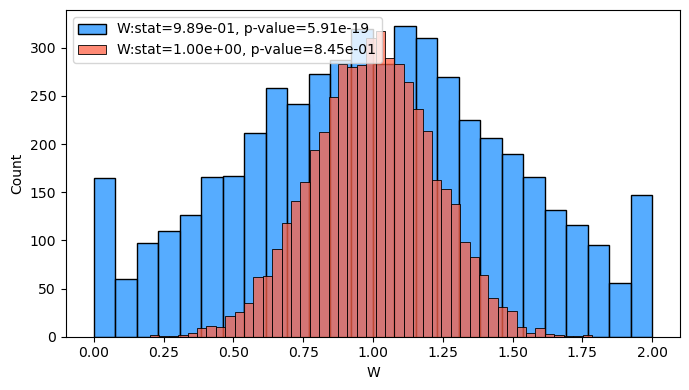

In [17]:
test = test_shapiro(smp_norm, pdf="normal", size=5000)

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)

idx = test.statistic.idxmin()
w = test.loc[idx]
sns.histplot(data=smp_norm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="dodgerblue")

idx = test.statistic.idxmax()
w = test.loc[idx]
sns.histplot(data=smp_norm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="tomato")

ax.set(xlabel="W")
ax.legend()
fig.tight_layout()

## Shapiro-Wilk test for lognormal samples and lognormal distribution

In [18]:
stat_norm = []
stat_lognorm = []
for n in [10, 50, 100, 500, 1000, 5000]:
    df = test_shapiro(smp_lognorm, pdf="normal", size=n)
    idx = df.statistic.idxmin()
    stat_norm.append(df.loc[idx].rename(n))

    df = test_shapiro(smp_lognorm, pdf="lognormal", size=n)
    idx = df.statistic.idxmin()
    stat_lognorm.append(df.loc[idx].rename(n))

opts = dict(left_index=True, right_index=True, suffixes=("_norm", "_lognorm"))
pd.DataFrame(stat_norm).merge(pd.DataFrame(stat_lognorm), **opts).rename_axis("# SMP")

,statistic_norm,pvalue_norm,statistic_lognorm,pvalue_lognorm
# SMP,,,,
10,6.84427e-01,5.70759e-04,9.99421e-01,1.18614e-01
50,8.25718e-01,3.62184e-06,9.99421e-01,1.18614e-01
100,8.75419e-01,1.16721e-07,9.99421e-01,1.18614e-01
500,8.95188e-01,5.44372e-18,9.99421e-01,1.18614e-01
1000,8.72472e-01,8.45888e-28,9.99421e-01,1.18614e-01
5000,8.98159e-01,0.00000e+00,9.99421e-01,1.18614e-01


### Plot the distribution of the parameter with closest and farthest resemblance to a lognormal PDF

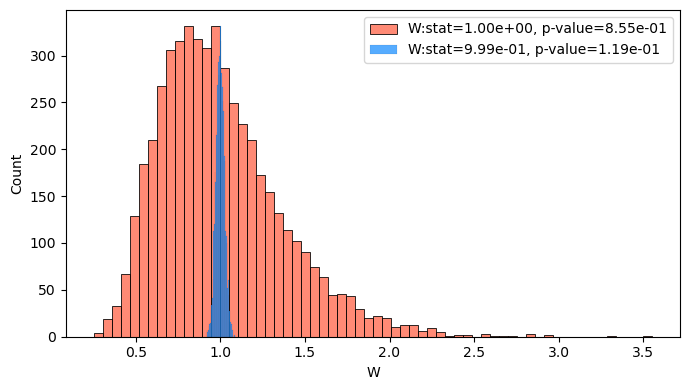

In [19]:
test = test_shapiro(smp_lognorm, pdf="lognormal", size=5000)

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)

idx = test.statistic.idxmax()
w = test.loc[idx]
sns.histplot(data=smp_lognorm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="tomato")

idx = test.statistic.idxmin()
w = test.loc[idx]
sns.histplot(data=smp_lognorm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="dodgerblue")

ax.set(xlabel="W")
ax.legend()
fig.tight_layout()